## Final Project Submission

Please fill out:
* Student name: Betsy Gitije
* Student pace: self paced / part time / full time -fulltime
* Scheduled project review date/time: 01/12/2024
* Instructor name: William Okomba
* Blog post URL:


In [63]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#setting a default data viewer
pd.set_option('display.max_columns', 500)

##  Aviation data Overview

In [64]:
#loading  the Aviation Data using the path
df= pd.read_csv('Aviation_Data.csv', low_memory=False)

In [65]:
#Checking top 5 and bottom 5 rows in the data
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


Observation: several missing values denoted as NaN

In [66]:
#checking the shape
df.shape

(90348, 31)

In [67]:
#checking the columns
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [68]:
#checking the column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

Observation :most column are strings (object) with a few numerical (float64) columns

In [69]:
#checking the statistical summary for the numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [70]:
#Checking the statistical summary for the categorical variables
df.describe(include='O').T

,count,unique,top,freq
Event.Id,88889,87951,20001212X19172,3
Investigation.Type,90348,71,Accident,85015
Accident.Number,88889,88863,CEN22LA149,2
Event.Date,88889,14782,1984-06-30,25
Location,88837,27758,"ANCHORAGE, AK",434
Country,88663,219,United States,82248
Latitude,34382,25589,332739N,19
Longitude,34373,27154,0112457W,24
Airport.Code,50132,10374,NONE,1488
Airport.Name,52704,24870,Private,240


## Aviation Data Cleaning

In [71]:
#Make a copy of the original dataset
avi_df=df.copy()

In [72]:
#fixing the column names to make them uniform
avi_df.columns= avi_df.columns.str.lower().str.replace('.','_')
avi_df.columns

Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description',
       'schedule', 'purpose_of_flight', 'air_carrier', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status',
       'publication_date'],
      dtype='object')

In [73]:
#standardize data format on Event_date column 
avi_df['event_date'] = pd.to_datetime(avi_df['event_date'])


In [74]:
#Handling missing data
avi_df.isnull().sum()

event_id                   1459
investigation_type            0
accident_number            1459
event_date                 1459
location                   1511
country                    1685
latitude                  55966
longitude                 55975
airport_code              40216
airport_name              37644
injury_severity            2459
aircraft_damage            4653
aircraft_category         58061
registration_number        2841
make                       1522
model                      1551
amateur_built              1561
number_of_engines          7543
engine_type                8555
far_description           58325
schedule                  77766
purpose_of_flight          7651
air_carrier               73700
total_fatal_injuries      12860
total_serious_injuries    13969
total_minor_injuries      13392
total_uninjured            7371
weather_condition          5951
broad_phase_of_flight     28624
report_status              7843
publication_date          16689
dtype: i

In [75]:
#dropping columns with high percentage of missing data
#calculate the threshold and drop columns with 50% missing data
threshold= 0.5
avi_df= avi_df.loc[:, avi_df.isnull().mean()<threshold]


In [76]:
avi_df.drop(['event_id', 'accident_number', 'airport_code', 
             'airport_name', 'registration_number', 'publication_date'], 
            axis=1, inplace=True)

In [77]:
#imputing missing data for numerical columns with 0
avi_df.loc[:, avi_df.select_dtypes(include='number').columns] = avi_df.select_dtypes(include='number').fillna(0)
avi_df.select_dtypes(include='number').isna().sum()

number_of_engines         0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
dtype: int64

In [78]:
avi_df.select_dtypes(include='O').isnull().sum()

investigation_type           0
location                  1511
country                   1685
injury_severity           2459
aircraft_damage           4653
make                      1522
model                     1551
amateur_built             1561
engine_type               8555
purpose_of_flight         7651
weather_condition         5951
broad_phase_of_flight    28624
report_status             7843
dtype: int64

In [79]:
#imputing missing data for categorical columns using mode
categorical_columns = ['injury_severity', 'aircraft_damage', 'amateur_built']
for col in categorical_columns:
    avi_df[col].fillna(avi_df[col].mode()[0])


In [80]:
#imputing missing data for categorical columns using 'unknown'
categorical_column2 = [
    'location', 'country', 'make', 'model', 'engine_type',
    'purpose_of_flight', 'weather_condition', 'broad_phase_of_flight', 'report_status'
]
avi_df.loc[:, categorical_column2] = avi_df[categorical_column2].fillna('unknown')

In [81]:
# Fill missing dates with the median date
median_date = avi_df['event_date'].median()
avi_df['event_date'] = avi_df['event_date'].fillna(median_date)

avi_df.isna().sum()

investigation_type           0
event_date                   0
location                     0
country                      0
injury_severity           2459
aircraft_damage           4653
make                         0
model                        0
amateur_built             1561
number_of_engines            0
engine_type                  0
purpose_of_flight            0
total_fatal_injuries         0
total_serious_injuries       0
total_minor_injuries         0
total_uninjured              0
weather_condition            0
broad_phase_of_flight        0
report_status                0
dtype: int64

In [82]:
#Checking for duplicates
avi_df.duplicated().sum()

1422

In [83]:
#Remove all duplicates
avi_df.drop_duplicates(inplace=True)


In [84]:
avi_df['weather_condition'].unique()

array(['UNK', 'IMC', 'VMC', 'unknown', 'Unk'], dtype=object)

In [85]:
#create a new column replacing it  with more descriptive weather conditions
avi_df["weather_category"] = avi_df["weather_condition"].replace(
    {"VMC": "Visual", "IMC": "Instrumental", "UNK": "Unknown"})

avi_df[['weather_condition','weather_category']]


,weather_condition,weather_category
0,UNK,Unknown
1,UNK,Unknown
2,IMC,Instrumental
3,IMC,Instrumental
4,VMC,Visual
...,...,...
90343,unknown,unknown
90344,unknown,unknown
90345,VMC,Visual
90346,unknown,unknown


In [86]:
#creating  new column on accidents severity that calculates a numerical value depending on the weight of the injury
weights = {'fatal': 5,'serious': 3,'minor': 1}

avi_df['severity_index'] = (
    avi_df['total_fatal_injuries'] * weights['fatal'] +
    avi_df['total_serious_injuries'] * weights['serious'] +
    avi_df['total_minor_injuries'] * weights['minor']
)
avi_df.columns

Index(['investigation_type', 'event_date', 'location', 'country',
       'injury_severity', 'aircraft_damage', 'make', 'model', 'amateur_built',
       'number_of_engines', 'engine_type', 'purpose_of_flight',
       'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition',
       'broad_phase_of_flight', 'report_status', 'weather_category',
       'severity_index'],
      dtype='object')

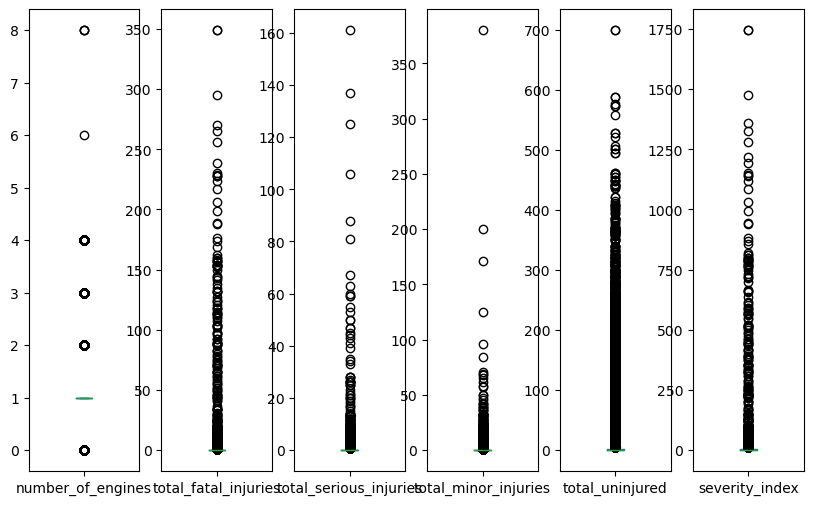

In [87]:
#checking for outliers in the dataset
avi_df.plot(kind='box', subplots=True,figsize=(10,6))
plt.show()

In [88]:
#removing the outliers
# Select relevant columns
columns = ['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries','total_uninjured','severity_index']

# Calculate IQR for each column
q1 = avi_df[columns].quantile(0.05)
q3 = avi_df[columns].quantile(0.09)
iqr = q3 - q1

# Compute lower and upper bounds for each column
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter rows where values are within bounds for all selected columns and drop the rows with outliers
avi_df2 = avi_df[
    (avi_df[columns] >= lower_bound) & (avi_df[columns] <= upper_bound)
].dropna()

<Axes: >

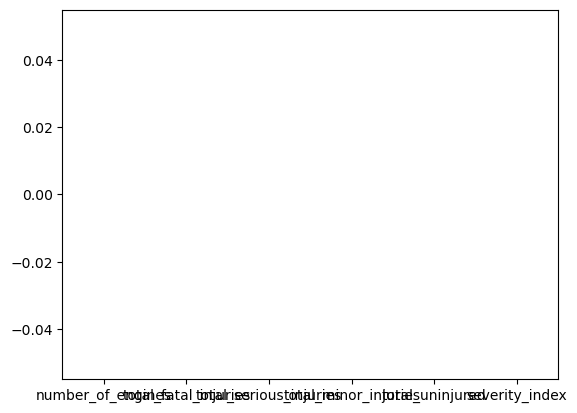

In [89]:
avi_df2.plot(kind='box')

Observation:Removing outliers result to lose significant amount of data so i will retain my original dataset

In [90]:
#saving the new clean dataframe 
avi_df.to_csv("Aviation_Data_clean.csv", index=False)

In [91]:
#load the clean Dataset 
aviation_df=pd.read_csv("Aviation_Data_clean.csv")
aviation_df.head()

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,weather_category,severity_index
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,Unknown,10.0
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,Unknown,20.0
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,Instrumental,15.0
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,Instrumental,10.0
4,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,0.0,unknown,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,Visual,11.0


## Aviation Data EDA

How do accident rates vary by aircraft model or make?

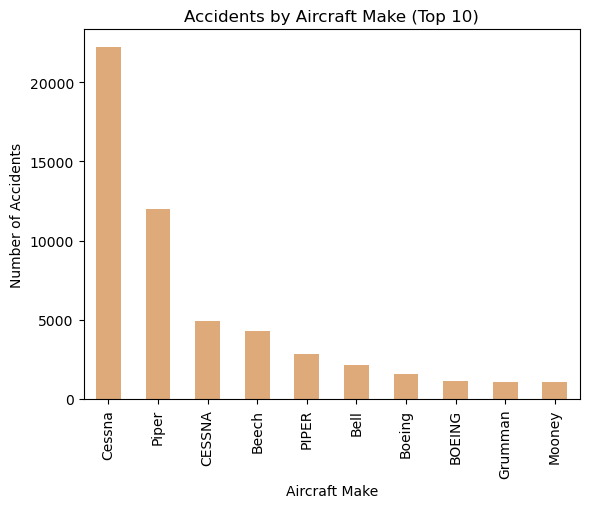

In [92]:
#Accidents by make
accidents_by_make = aviation_df.groupby('make').size().sort_values(ascending=False)

accidents_by_make.head(10).plot(kind='bar', color='#DEAA79')
plt.title('Accidents by Aircraft Make (Top 10)')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.show()

Observation: Cessna manufacturers have the highest number of accidents

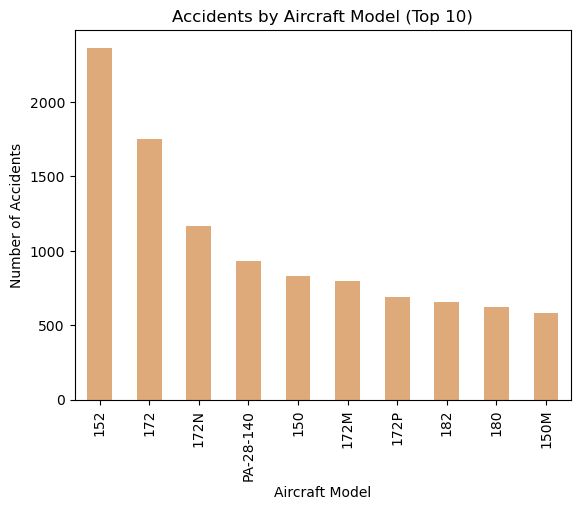

In [93]:
#Accidents by model
accidents_by_model = aviation_df.groupby('model').size().sort_values(ascending=False)

#plot accident by model
accidents_by_model.head(10).plot(kind='bar', color='#DEAA79')
plt.title('Accidents by Aircraft Model (Top 10)')
plt.xlabel('Aircraft Model')
plt.ylabel('Number of Accidents')

plt.show()


Observation: These are top 10 models with the highest severity index hence lowest reliability

What is the severity of accidents by weather conditions?

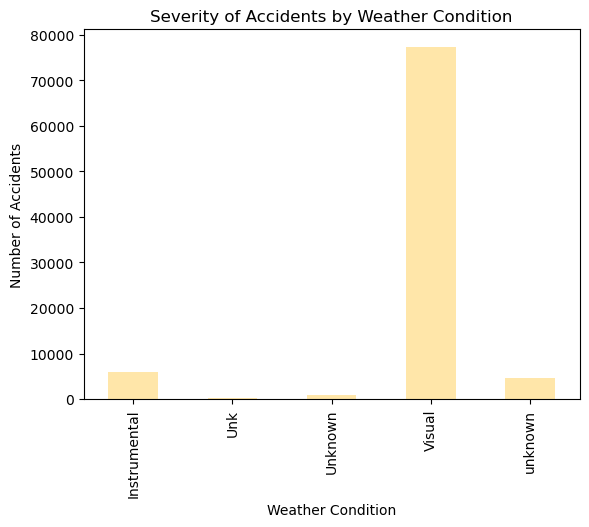

In [94]:
#accident severity by weather conditions
accidents_by_weather_severity= aviation_df.groupby('weather_category')['severity_index'].count()

accidents_by_weather_severity.plot(kind='bar', color='#FFE6A9')
plt.title('Severity of Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')

plt.show()

     Observation:Accidents are more severe under the visual meteorological conditions

 Analyze the relationship between accident severity and weather conditions across different aircraft makes

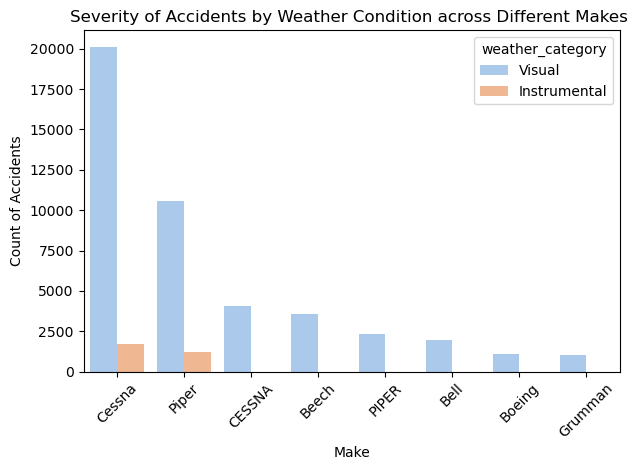

In [95]:
# Weather category and make by accident severity
accidents_by_weather_severity = aviation_df.groupby(['weather_category', 'make'])['severity_index'].count().sort_values(ascending=False).reset_index()

# Plot 
sns.barplot(
    data=accidents_by_weather_severity.head(10),
    x='make',
    y='severity_index',
    hue='weather_category',
    palette='pastel'
)

plt.title('Severity of Accidents by Weather Condition across Different Makes ')
plt.xlabel('Make')
plt.ylabel('Count of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

What is the trend in aircraft accident severity over time?

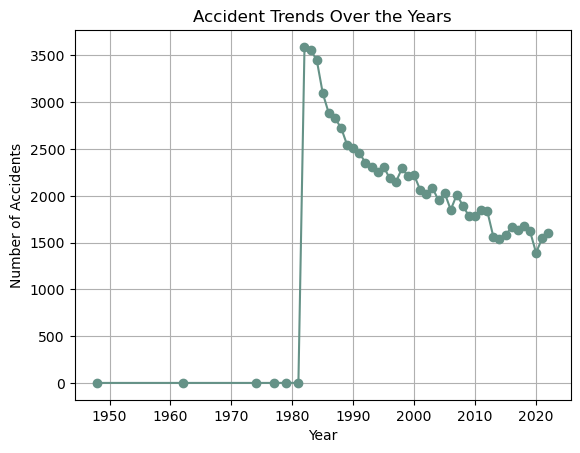

In [96]:
# Convert event_date to datetime and extract year
aviation_df['event_year'] = pd.to_datetime(aviation_df['event_date'], errors='coerce').dt.year

# Accident trends by year
accidents_by_year = aviation_df['event_year'].value_counts().sort_index()

#plt.figure(figsize=(12, 6))
accidents_by_year.plot(kind='line', marker='o', color='#659287')
plt.title('Accident Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)

plt.show()

Observations: There was a spike in number of accidents in the year 1980

What is correlation accidents by flight phase?

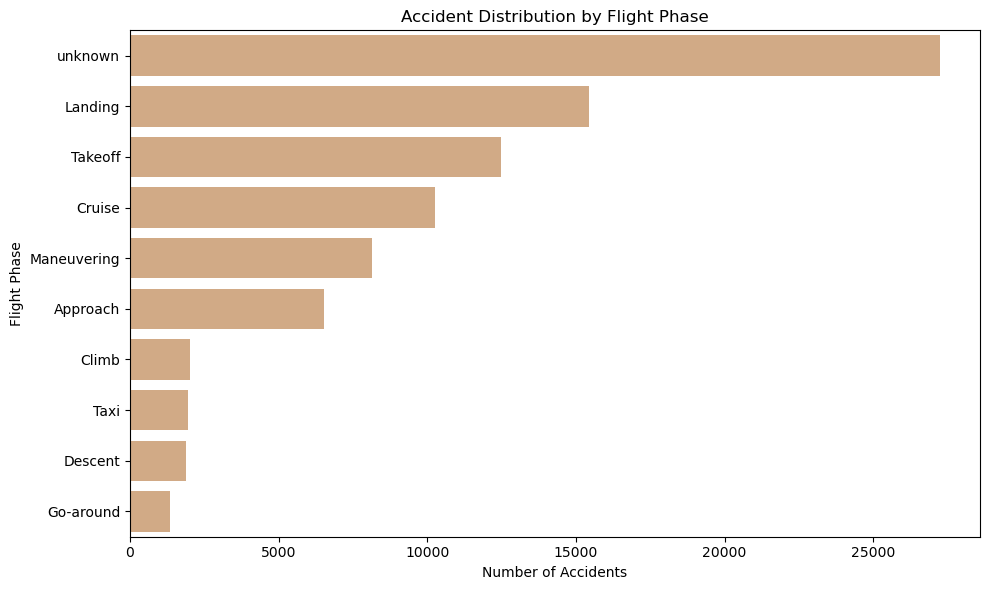

In [97]:
# Accident distribution by flight phase
flight_phase_distribution = aviation_df['broad_phase_of_flight'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=flight_phase_distribution.values,y=flight_phase_distribution.index,color='#DEAA79',legend=False)
plt.title('Accident Distribution by Flight Phase')
plt.xlabel('Number of Accidents')
plt.ylabel('Flight Phase')
plt.tight_layout()
plt.show()

 Observation: There is need for better data collection to avoid unknown data gaps

What is the correlation of the size of aircrafts and accidents severity?

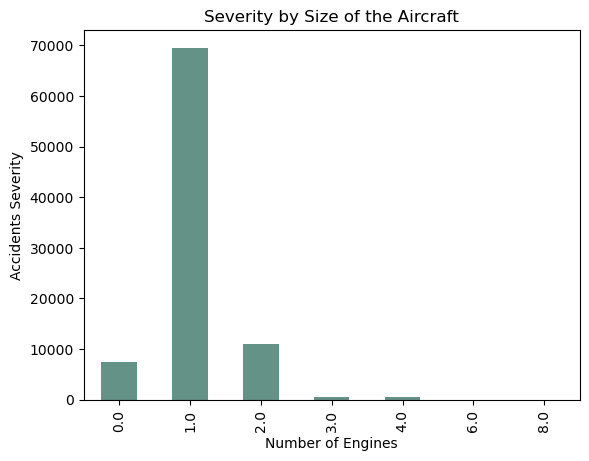

In [98]:
#severity of accidents according to the number of engines
size_severity = aviation_df.groupby('number_of_engines')['severity_index'].size()

size_severity.plot(kind='bar',color='#659287')
plt.title('Severity by Size of the Aircraft')
plt.xlabel('Number of Engines')
plt.ylabel('Accidents Severity')

plt.show()

   Observation:single-engine aircraft are more prone to accidents